In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# 指定亂數種子
seed = 7
np.random.seed(seed)

# 載入資料集
(x_train, _), (x_test, _) = mnist.load_data()

# 轉換成 4D 張量
x_train_new = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")
x_test_new = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")

# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
x_train_norm = x_train_new / 255
x_test_norm = x_test_new / 255

# 定義 autoencoder 模型
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()    # 顯示模型摘要資訊

# 定義 encoder 模型
encoder = Model(input_img, encoded)
encoder.summary()   # 顯示模型摘要資訊

# 定義 decoder 模型
decoder_input = Input(shape=(4,4,8))
decoder_layer = autoencoder.layers[-7](decoder_input)
decoder_layer = autoencoder.layers[-6](decoder_layer)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input, decoder_layer)
decoder.summary()   # 顯示模型摘要資訊


11490434/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                              

In [ ]:
# 編譯模型
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 訓練模型
autoencoder.fit(x_train_norm, x_train_norm, validation_data=(x_test_norm, x_test_norm), epochs=10, batch_size=128, shuffle=True, verbose=2)

# 壓縮圖片
encoded_imgs = encoder.predict(x_test_norm)

# 解壓縮圖片
decoded_imgs = decoder.predict(encoded_imgs)


Epoch 1/10
469/469 - 14s - loss: 0.2221 - accuracy: 0.7982 - val_loss: 0.1428 - val_accuracy: 0.8031 - 14s/epoch - 31ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1330 - accuracy: 0.8056 - val_loss: 0.1244 - val_accuracy: 0.8076 - 2s/epoch - 5ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1219 - accuracy: 0.8081 - val_loss: 0.1175 - val_accuracy: 0.8079 - 2s/epoch - 5ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1167 - accuracy: 0.8091 - val_loss: 0.1136 - val_accuracy: 0.8091 - 2s/epoch - 5ms/step
Epoch 5/10
469/469 - 2s - loss: 0.1132 - accuracy: 0.8098 - val_loss: 0.1104 - val_accuracy: 0.8092 - 2s/epoch - 5ms/step
Epoch 6/10
469/469 - 2s - loss: 0.1106 - accuracy: 0.8103 - val_loss: 0.1081 - val_accuracy: 0.8100 - 2s/epoch - 5ms/step
Epoch 7/10
469/469 - 2s - loss: 0.1085 - accuracy: 0.8106 - val_loss: 0.1063 - val_accuracy: 0.8101 - 2s/epoch - 5ms/step
Epoch 8/10
469/469 - 2s - loss: 0.1068 - accuracy: 0.8110 - val_loss: 0.1047 - val_accuracy: 0.8104 - 2s/epoch - 5ms/step
Epoch 9/10
469/469 - 

In [ ]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 4, 4, 8)
(10000, 28, 28, 1)


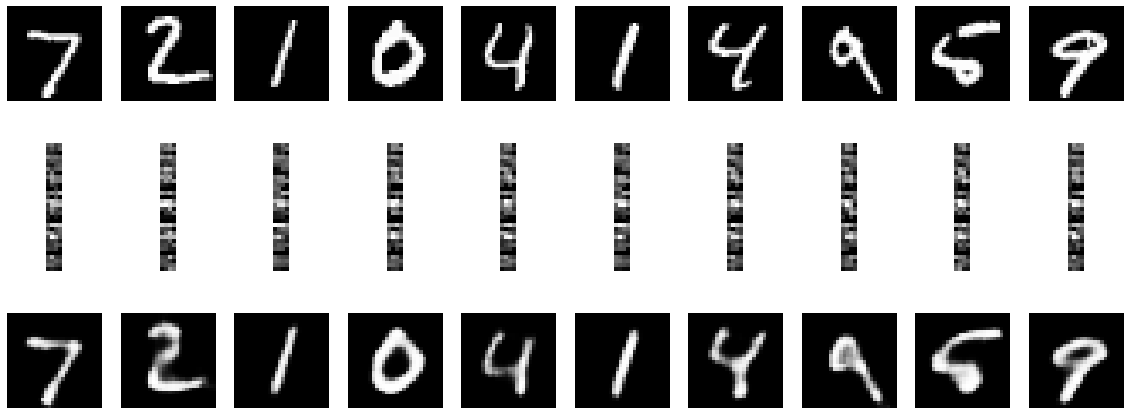

In [ ]:
# 顯示原始, 壓縮和還原圖片
import matplotlib.pyplot as plt

n = 10  # 顯示幾個數字
plt.figure(figsize=(20, 8))
for i in range(n):
    # 原始圖片
    ax = plt.subplot(3, n, i + 1)
    ax.imshow(x_test_norm[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    # 壓縮圖片
    ax = plt.subplot(3, n, i + 1 + n)
    ax.imshow(encoded_imgs[i].reshape(4, 4*8).T, cmap='gray')
    ax.axis('off')
    # 還原圖片
    ax = plt.subplot(3, n, i + 1 + 2*n)
    ax.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

In [ ]:
# my test
# upsampling2d

from keras.layers import UpSampling2D
import numpy as np
import tensorflow as tf

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
x = x.reshape(1,4,4,1)
x = tf.convert_to_tensor(x)
y = UpSampling2D(size=(2,2))(x)
print(y.shape)

(1, 8, 8, 1)


In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
x = x.reshape(1,2,2,1)
x = tf.convert_to_tensor(x)
y = UpSampling2D(size=(2,2))(x)
print(y.shape)
print(y)


(1, 4, 4, 1)
tf.Tensor(
[[[[1]
   [1]
   [2]
   [2]]

  [[1]
   [1]
   [2]
   [2]]

  [[3]
   [3]
   [4]
   [4]]

  [[3]
   [3]
   [4]
   [4]]]], shape=(1, 4, 4, 1), dtype=int64)
